In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df =pd.read_csv('data/AdSmartABdata.csv')
df.sample(2)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
1155,25d4b252-dc32-4e41-9c87-d5c55a476025,exposed,2020-07-08,23,Generic Smartphone,6,Chrome Mobile,0,0
4010,80f03dc8-3259-4c67-8928-3cf68a5d1831,exposed,2020-07-08,6,Generic Smartphone,6,Chrome Mobile,0,0


In [25]:
df.sort_values(by='experiment')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
4038,818f37f3-dae8-4a33-a22e-e54056e0ba7d,control,2020-07-03,15,Samsung SM-A600FN,6,Chrome Mobile WebView,0,0
4521,902a058f-8a97-47d1-b260-9dc7011fd9fc,control,2020-07-09,13,Samsung SM-G965F,6,Samsung Internet,0,0
4519,9017d3c0-70cb-4e20-9316-86d54a941375,control,2020-07-10,15,Generic Smartphone,6,Chrome Mobile,0,0
4517,8fff9d59-1927-4932-9ef6-04068646e0db,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0
4504,8f78ea0d-da5a-43a5-b03a-41b623026007,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
1673,37396986-4e16-4024-b448-b727d339377a,exposed,2020-07-08,15,OnePlus ONEPLUS A6013,6,Facebook,0,0
1674,373cba3b-61af-4574-8c52-dc2b2e7ad5bf,exposed,2020-07-04,11,Generic Smartphone,6,Chrome Mobile,0,0
4755,9795c323-e96b-492c-b8b5-eb05de04a8c1,exposed,2020-07-09,6,Generic Smartphone,6,Chrome Mobile,0,0
4764,9812db3b-2c00-472d-8d30-a0b06c813357,exposed,2020-07-10,15,Samsung SM-G960F,6,Chrome Mobile WebView,0,0


In [26]:
print(f'Number of unquie users in the experiment: {df["auction_id"].nunique()}')
print(f'Percentage of users in control: {round(df[df["experiment"]=="control"].shape[0] * 100 / df.shape[0])} %')

Number of unquie users in the experiment: 8077
Percentage of users in control: 50 %


In [5]:
# Check for duplicates
if df.iloc[: ,0].nunique() == df.shape[0]:
    print('There are no duplicates in the dataset')
else:
    print('There are some duplicates in the dataset')

if df.isnull().sum().sum() == 0:
    print('There are no null values')
else:
    print('There are some null values')

There are no duplicates in the dataset
There are no null values


In [27]:
df.browser.unique()

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Mobile Safari', 'Chrome Mobile iOS', 'Samsung Internet',
       'Mobile Safari UI/WKWebView', 'Chrome', 'Opera Mini',
       'Edge Mobile', 'Android', 'Pinterest', 'Opera Mobile',
       'Firefox Mobile', 'Puffin'], dtype=object)

In [28]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [30]:
import datetime
df['day'] = df['date'].apply(lambda x: pd.to_datetime(x, format ="%Y-%m-%d").day_name())
df.sort_values(by='day').head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,day
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4002,8099b8b8-cddf-4a73-acf7-68b882199ac9,exposed,2020-07-10,6,Generic Smartphone,6,Opera Mobile,0,0,Friday
4004,80b8db90-c0cb-4c5d-977b-a8d0ea81f83e,control,2020-07-10,10,Samsung SM-J320FN,6,Samsung Internet,0,0,Friday
4013,80fa4065-1e42-4f38-b8d4-9bbf46159b4c,exposed,2020-07-03,11,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4024,812d75df-6f5d-434e-9fbf-4790f9042a7c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4026,813d28f3-f7a8-4856-bcc9-edd53003ad6e,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4028,8155078e-5658-4177-9bc5-404127e2d1b9,exposed,2020-07-10,13,Samsung SM-A300FU,6,Chrome Mobile WebView,0,1,Friday
4041,81acdb19-8f95-43fd-bc20-c29956dc975c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4058,8243f244-97c1-4c90-9a4f-924c5737518a,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4066,826d31e4-dddb-4188-90b5-13a6f34bea2c,exposed,2020-07-03,6,Generic Smartphone,6,Chrome Mobile,0,0,Friday


# Univarate Analysis


In [31]:
def plot(df:pd.DataFrame, x_col:str, title:str,rotation=0):
    plt.figure(figsize=(12, 6))
    plt.title(title);
    plt.xticks(rotation=rotation)
    sns.countplot(data=df, x=x_col)
  
    plt.show()

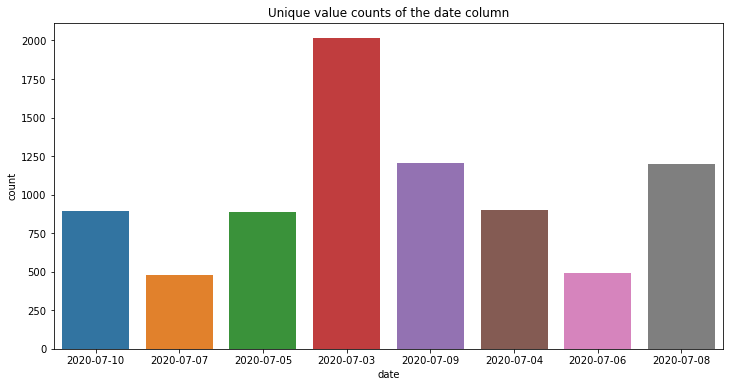

In [32]:
plot(df,'date','Unique value counts of the date column')

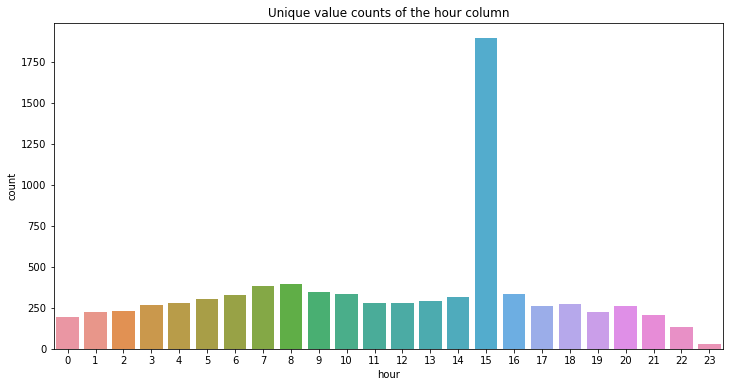

In [33]:
plot(df,'hour','Unique value counts of the hour column')

Hour 15 was the most busiest as the visitors traffic was very high almost 3 times the average of the rest hours.

In [34]:
df['device_make'].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [35]:
df['platform_os'].value_counts()


6    7648
5     428
7       1
Name: platform_os, dtype: int64

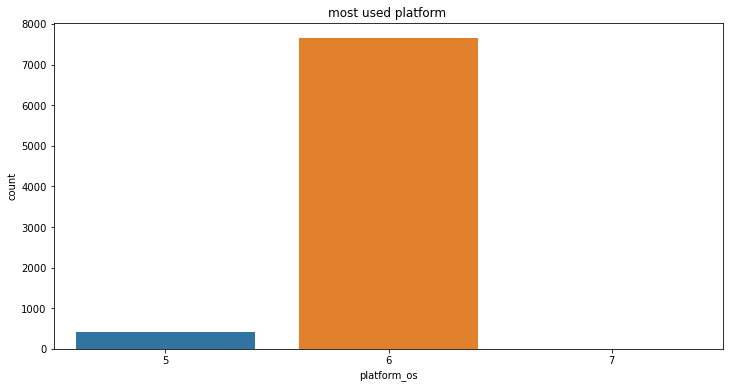

In [39]:
plot(df,'platform_os','most used platform ')

In [40]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

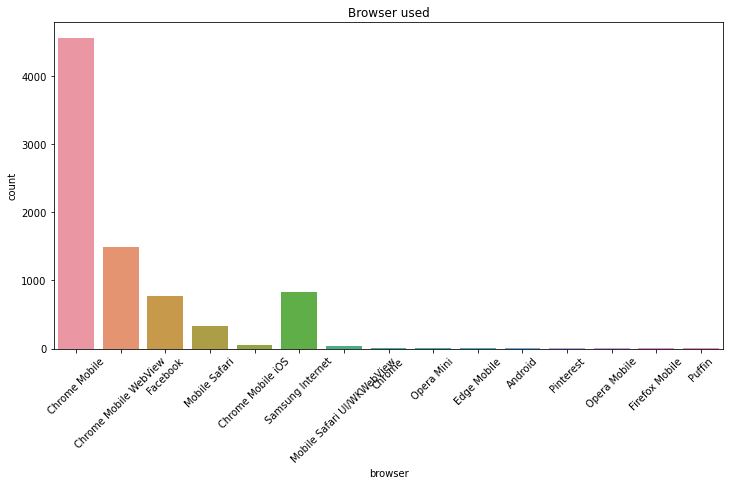

In [41]:
plot(df,"browser",'Browser used',45)


Chrome is the most used browser

In [42]:
df['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

In [43]:
df['day'].value_counts()

Friday       2908
Thursday     1208
Wednesday    1198
Saturday      903
Sunday        890
Monday        490
Tuesday       480
Name: day, dtype: int64

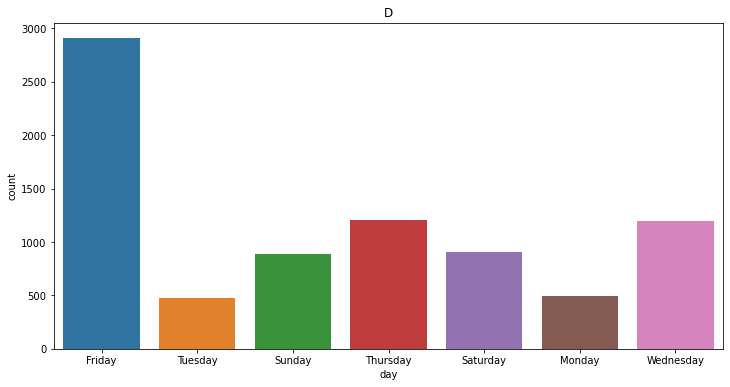

In [44]:
plot(df,'day','D')

# Bivariate Analysis


In [45]:
def bi_plot(df:pd.DataFrame, x_col:str, y_col:str, title:str, rotation=0):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=x_col , hue = y_col)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()
    

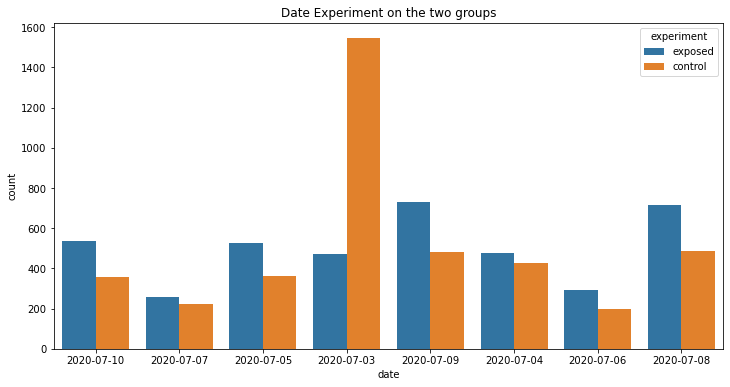

In [46]:
bi_plot(df,'date','experiment','Date Experiment on the two groups')

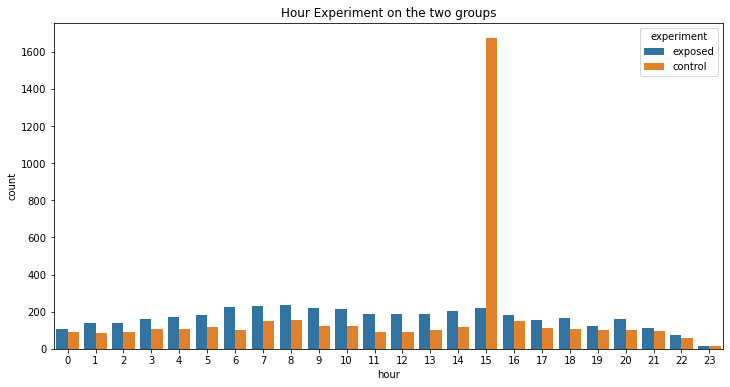

In [47]:
bi_plot(df,'hour','experiment','Hour Experiment on the two groups')

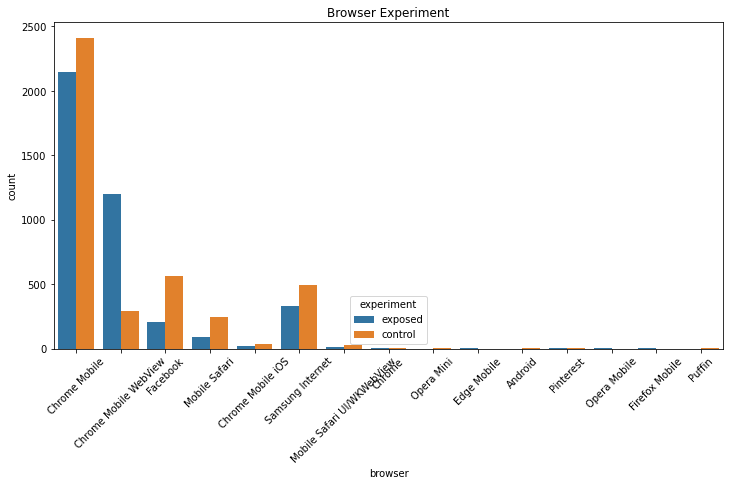

In [48]:
bi_plot(df,'browser','experiment','Browser Experiment',rotation=45)

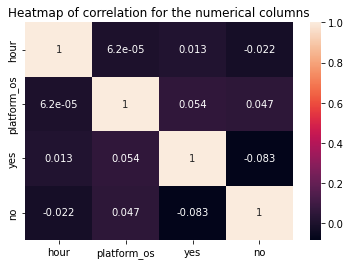

In [49]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()